## **Car Plate Number Detection using OpenCV and Tesseract OCR**

### Preparations

In [1]:
# Import libraries
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
# set inline plots size
plt.rcParams["figure.figsize"] = (15, 14) # (w, h)
import numpy as np
import cv2

In [2]:
!sudo apt install tesseract-ocr
!pip install pillow
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 10 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,584 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [3]:
import pytesseract

##Input##

In [4]:
!wget "https://docs.google.com/uc?export=download&id=1XGLQv0ggS5uFPMOcyu7xyDEMIiSV8pQM" -O yandexcar2.jpg
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml"

--2021-02-20 21:59:38--  https://docs.google.com/uc?export=download&id=1XGLQv0ggS5uFPMOcyu7xyDEMIiSV8pQM
Resolving docs.google.com (docs.google.com)... 173.194.217.102, 173.194.217.113, 173.194.217.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1ngc5gr52vvc5a0be7pglu7a81rkkdbu/1613858325000/10899021323991221277/*/1XGLQv0ggS5uFPMOcyu7xyDEMIiSV8pQM?e=download [following]
--2021-02-20 21:59:38--  https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1ngc5gr52vvc5a0be7pglu7a81rkkdbu/1613858325000/10899021323991221277/*/1XGLQv0ggS5uFPMOcyu7xyDEMIiSV8pQM?e=download
Resolving doc-0g-84-docs.googleusercontent.com (doc-0g-84-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to doc-0g-84-docs.googleusercontent.com (doc-0g

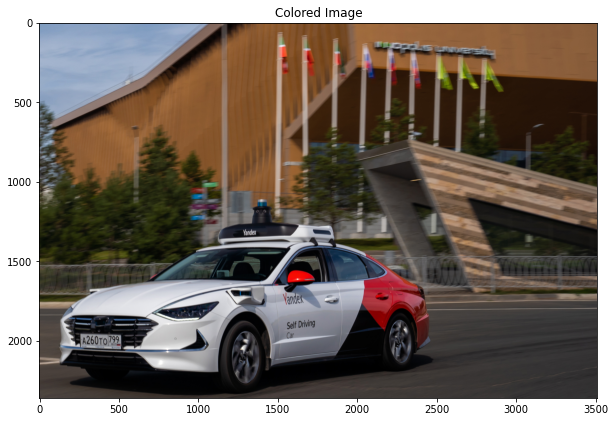

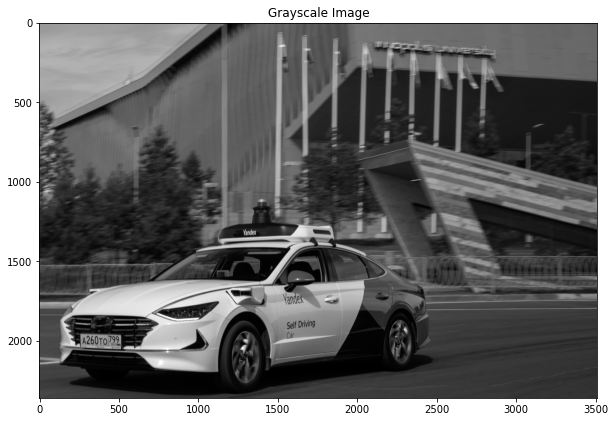

In [5]:
# Read Image, little preprocessing
car_color = cv2.imread('yandexcar2.jpg', cv2.IMREAD_COLOR)
car_color = cv2.cvtColor(car_color, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title('Colored Image')
plt.imshow(car_color)
plt.show()

car_gray =  cv2.imread('yandexcar2.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.title('Grayscale Image')
plt.imshow(car_gray, cmap='gray')
plt.show()

In [6]:
# Image coordinates of the extermities of plates
plate_points_1 = np.array([[262,1960], [516,1960], [518,2032], [262, 2028]], np.int32) # plate yandex car

## **Draw borders around the plate number**

In [7]:
# This file contains an XML file for Russian Car Plate Numbers
carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [8]:
# Function to detect carplate numbers using the haar cascade file
def detect(image):
    img = image.copy()

    carplate_rects = carplate_haar_cascade.detectMultiScale(img,
                     scaleFactor=1.1, minNeighbors=5)
    
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    cv2.rectangle(img, (262,1960), (518, 2040), (0, 255, 255), 5)

    return img

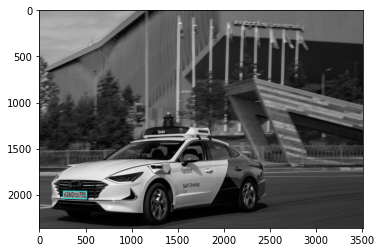

In [9]:
detected_carplate = detect(car_gray)
plt.imshow(detected_carplate)
plt.show()

In [10]:
# Function to extract the plate number
def extract(image):
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,
                            scaleFactor=1.1, minNeighbors=5)
    
    carplate_img = image[1960:2040, 262:518]

    return carplate_img

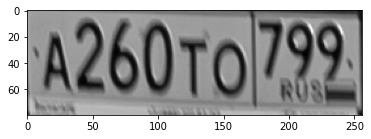

In [11]:
extract = extract(car_gray)
plt.imshow(extract, cmap='gray')
plt.show()

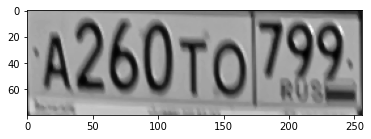

In [12]:
# Smoothen the image
smoothen = cv2.medianBlur(extract, 3)
plt.imshow(smoothen, cmap='gray')
plt.show()

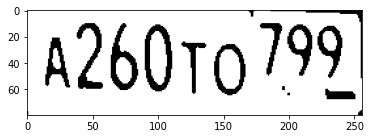

In [13]:
# Apply segmentation
thresh1 = cv2.adaptiveThreshold(smoothen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=55, C=5)
ret,thresh2 = cv2.threshold(smoothen, 70, 255, cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap='gray')
plt.show()

## **Text recognition using Tesseract**

In [15]:
text = pytesseract.image_to_string(thresh2, config = '--psm 8 --oem 3')
print(text)

A260T0 799.



In [16]:
A = [val for val in text[:6]]
B = [val for val in text[7:10]]
C = A + B
print(C)

['A', '2', '6', '0', 'T', '0', '7', '9', '9']


## **Concatenation of the plate number**


In [ ]:
concat = ''.join(C)
concat

'A260T0799'

## **References**

https://towardsdatascience.com/russian-car-plate-detection-with-opencv-and-tesseractocr-dce3d3f9ff5c